In [1]:
import pandas as pd
from sklearn.linear_model import LogisticRegression

In [5]:
bank = pd.read_csv("bank-full.csv",sep=';')

In [6]:
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [7]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [8]:
bank.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [9]:
bank.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [10]:
features=["age","default","balance","duration","campaign","pdays","previous"]

In [11]:
X=bank[features]

In [12]:
y=bank.y

In [13]:
X.head()

,age,default,balance,duration,campaign,pdays,previous
0,58,no,2143,261,1,-1,0
1,44,no,29,151,1,-1,0
2,33,no,2,76,1,-1,0
3,47,no,1506,92,1,-1,0
4,33,no,1,198,1,-1,0


In [14]:
X=pd.get_dummies(X)

In [15]:
y=pd.get_dummies(y)

In [16]:
X

,age,balance,duration,campaign,pdays,previous,default_no,default_yes
0,58,2143,261,1,-1,0,1,0
1,44,29,151,1,-1,0,1,0
2,33,2,76,1,-1,0,1,0
3,47,1506,92,1,-1,0,1,0
4,33,1,198,1,-1,0,1,0
...,...,...,...,...,...,...,...,...
45206,51,825,977,3,-1,0,1,0
45207,71,1729,456,2,-1,0,1,0
45208,72,5715,1127,5,184,3,1,0
45209,57,668,508,4,-1,0,1,0


In [17]:
X = X.drop(['default_no'], axis= 1)

In [18]:
y = y.rename(columns= {'no': 'y'})

In [19]:
y = y.drop(['yes'], axis=1)

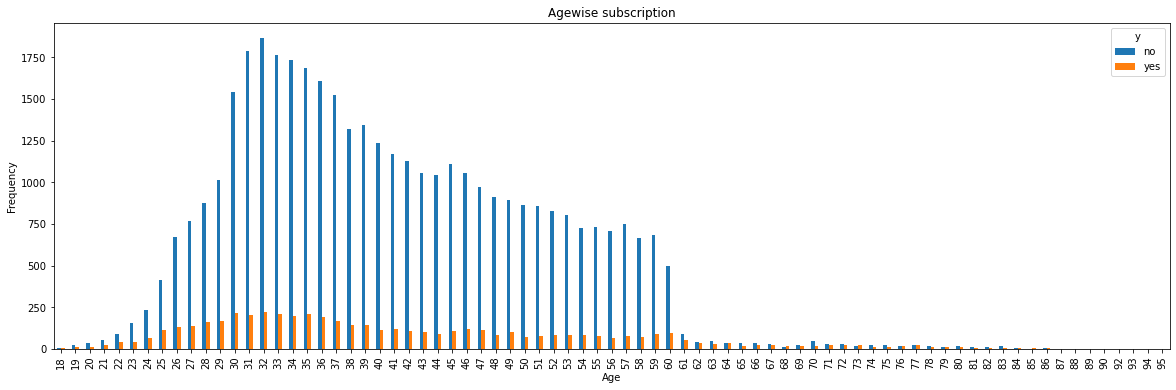

In [24]:
import matplotlib.pyplot as plt
pd.crosstab(bank.age,bank.y).plot(kind="bar",figsize=(20,6))
plt.title('Agewise subscription')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

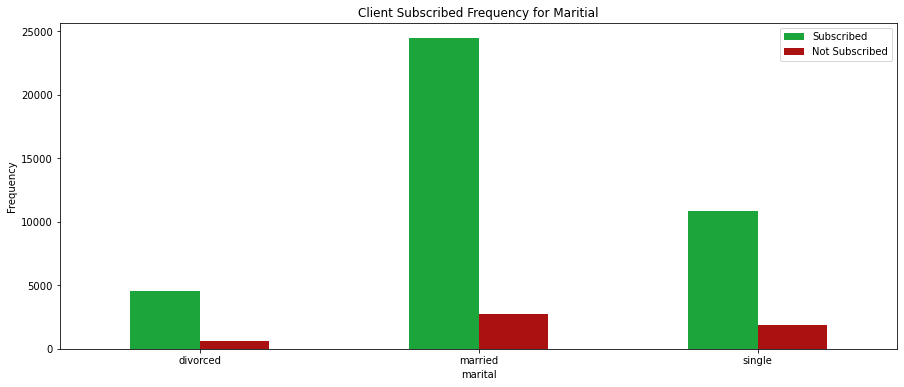

In [26]:
pd.crosstab(bank.marital,bank.y).plot(kind="bar",figsize=(15,6),color=['#1CA53B','#AA1111' ])
plt.title('Client Subscribed Frequency for Maritial')
plt.xlabel('marital')
plt.xticks(rotation=0)
plt.legend(["Subscribed", "Not Subscribed"])
plt.ylabel('Frequency')
plt.show()

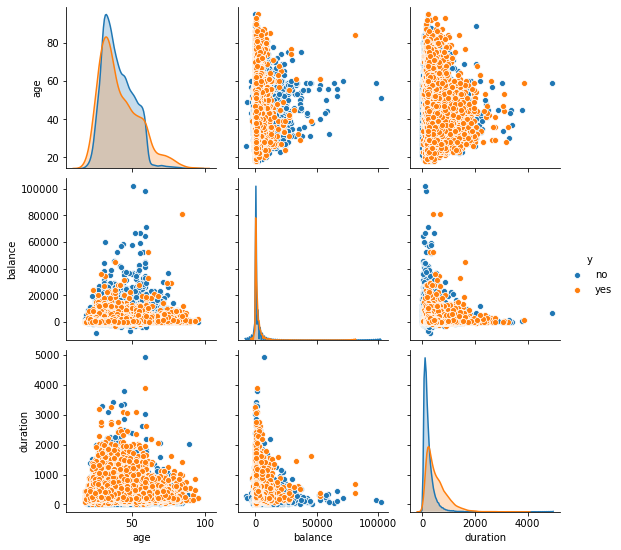

In [27]:
import seaborn as sns
sns.pairplot(data=bank, hue='y', vars= ['age', 'balance', 'duration'])

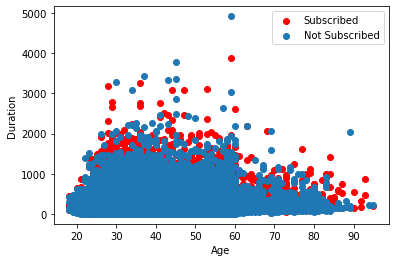

In [30]:
plt.scatter(x=bank.age[bank.y=='yes'], y=bank.duration[(bank.y=='yes')], c="red")
plt.scatter(x=bank.age[bank.y=='no'], y=bank.duration[(bank.y=='no')])
plt.legend(["Subscribed", "Not Subscribed"])
plt.xlabel("Age")
plt.ylabel("Duration")
plt.show()

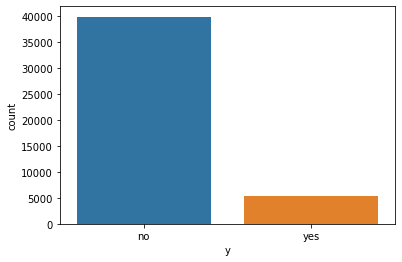

In [31]:
sns.countplot(x='y', data=bank, label='Count')

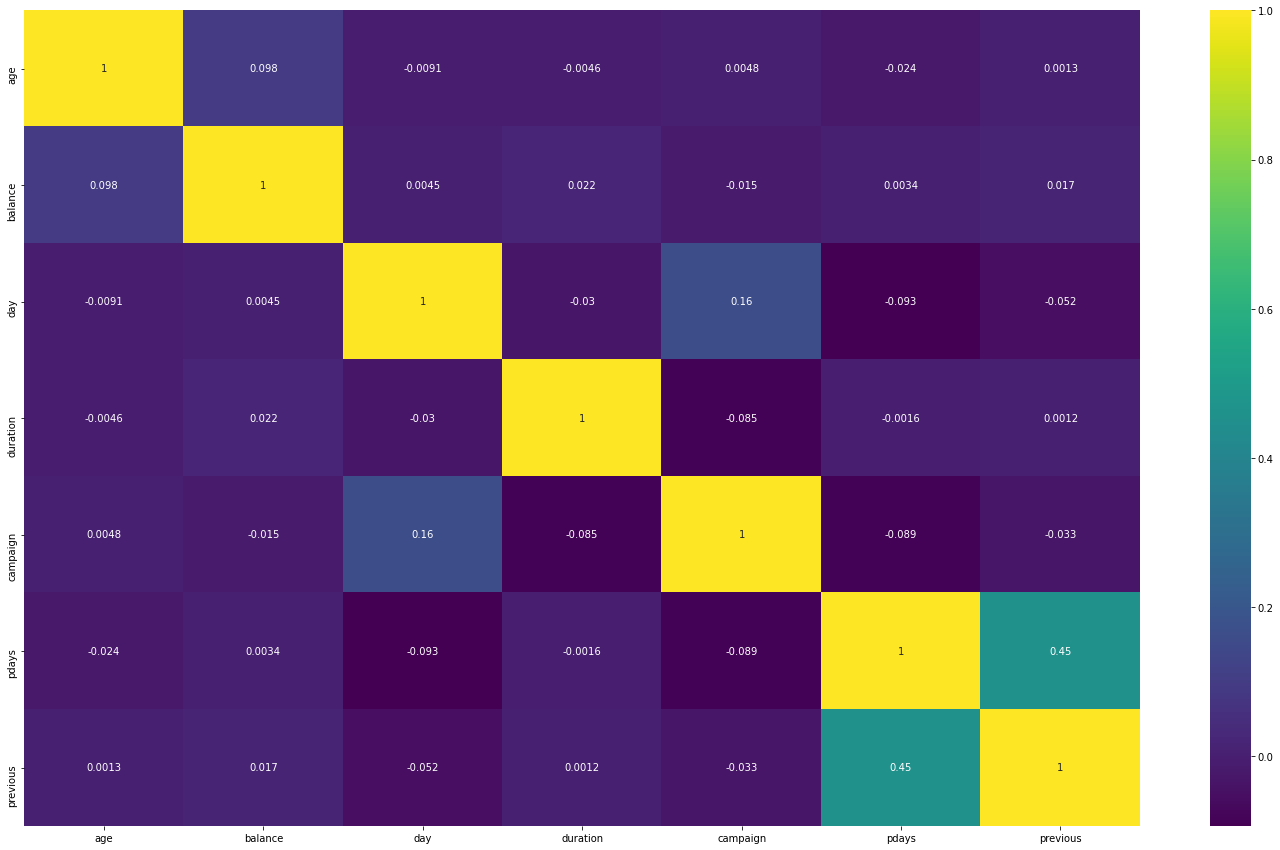

In [32]:
plt.figure(figsize=(25,15))
sns.heatmap(data=bank.corr(), annot=True, cmap='viridis')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001DB9800BC70>,
      dtype=object)

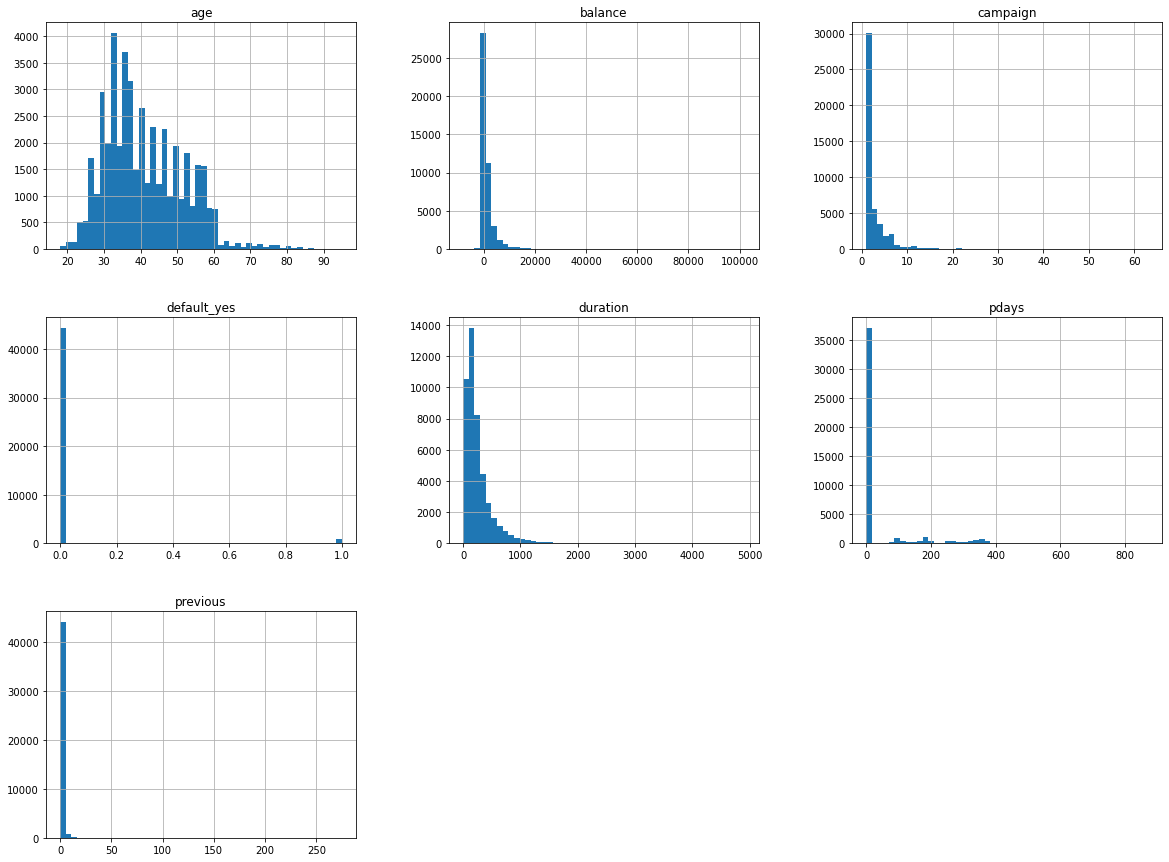

In [33]:
X.hist(bins=50, figsize=(20,15))

In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=0)

In [36]:
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(36168, 7) (9043, 7) (36168, 1) (9043, 1)


In [39]:
y_train['y'].value_counts()

1    31937
0     4231
Name: y, dtype: int64

In [41]:
X

,age,balance,duration,campaign,pdays,previous,default_yes
0,58,2143,261,1,-1,0,0
1,44,29,151,1,-1,0,0
2,33,2,76,1,-1,0,0
3,47,1506,92,1,-1,0,0
4,33,1,198,1,-1,0,0
...,...,...,...,...,...,...,...
45206,51,825,977,3,-1,0,0
45207,71,1729,456,2,-1,0,0
45208,72,5715,1127,5,184,3,0
45209,57,668,508,4,-1,0,0


In [44]:
# concatenate our training data back together
X = pd.concat([X_train, y_train], axis=1)
X

,age,balance,duration,campaign,pdays,previous,default_yes,y
10235,38,188,597,10,-1,0,0,1
44707,33,616,250,3,-1,0,0,0
29366,37,0,440,2,-1,0,0,1
39307,27,1842,687,2,300,1,0,1
26355,40,4341,290,1,-1,0,0,1
...,...,...,...,...,...,...,...,...
42711,62,243,117,1,280,1,0,1
2182,33,14,188,1,-1,0,0,1
29514,30,1013,24,9,-1,0,0,1
17428,57,0,1037,3,-1,0,0,1


In [38]:
#Data set is suffering from class imbalance problem

In [47]:
from sklearn.utils import resample# concatenate our training data back together
# separate minority and majority classes
def_no = X[X.y==0]
def_yes = X[X.y==1]

# upsample minority
fraud_upsampled = resample(def_yes,
                          replace=True, # sample with replacement
                          n_samples=len(def_no), # match number in majority class
                          random_state=27) # reproducible results

# combine majority and upsampled minority
upsampled = pd.concat([def_no, fraud_upsampled])

# check new class counts
upsampled.y.value_counts()

1    4231
0    4231
Name: y, dtype: int64

In [49]:
upsampled

,age,balance,duration,campaign,pdays,previous,default_yes,y
44707,33,616,250,3,-1,0,0,0
37095,38,1401,516,1,-1,0,0,0
40185,33,66,157,2,-1,0,0,0
31199,39,581,233,1,270,1,0,0
42133,36,506,217,1,70,2,0,0
...,...,...,...,...,...,...,...,...
8329,49,355,253,7,-1,0,0,1
36497,30,297,255,2,-1,0,0,1
30953,52,1646,92,3,-1,0,0,1
6785,24,53,226,1,-1,0,0,1


In [50]:
X=upsampled.drop(['y'], axis= 1)
y=upsampled['y']

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, stratify=y, random_state=0)

In [52]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train2 = pd.DataFrame(sc.fit_transform(X_train))
X_test2 = pd.DataFrame(sc.transform(X_test))
X_train2.columns = X_train.columns.values
X_test2.columns = X_test.columns.values
X_train2.index = X_train.index.values
X_test2.index = X_test.index.values
X_train = X_train2
X_test = X_test2

In [53]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0, penalty = 'l2')
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [54]:
# Predicting Test Set
y_pred = classifier.predict(X_test)
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

results = pd.DataFrame([['Logistic Regression (Lasso)', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

In [55]:
results

,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression (Lasso),0.769049,0.742279,0.823877,0.780952


In [56]:
#ROC curve

In [59]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

log_roc_auc=roc_auc_score(y_test, y_pred)


In [60]:
fpr, tpr, threshold = roc_curve(y_test, classifier.predict_proba(X_test)[:,1])

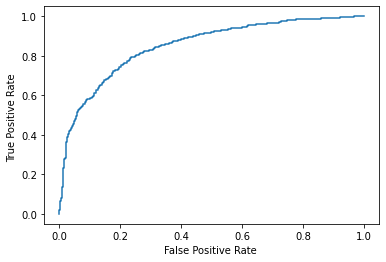

In [61]:
plt.figure()
plt.plot(fpr,tpr,label="Logistic Model" %log_roc_auc)
plt.xlabel("False Positive Rate ")
plt.ylabel("True Positive Rate ")
plt.show()